In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -----------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [49]:
data= df[['living area','number of bedrooms','number of bathrooms','Price']]

In [50]:
data.head()

,living area,number of bedrooms,number of bathrooms,Price
0,3650,5,2.50,2380000
1,2920,4,2.50,1400000
2,2910,5,2.75,1200000
3,3310,4,2.50,838000
4,2710,3,2.00,805000


In [51]:
print(data.isnull().sum())

living area            0
number of bedrooms     0
number of bathrooms    0
Price                  0
dtype: int64


In [52]:
print(data.describe())

        living area  number of bedrooms  number of bathrooms         Price
count  14620.000000        14620.000000         14620.000000  1.462000e+04
mean    2098.262996            3.379343             2.129583  5.389322e+05
std      928.275721            0.938719             0.769934  3.675324e+05
min      370.000000            1.000000             0.500000  7.800000e+04
25%     1440.000000            3.000000             1.750000  3.200000e+05
50%     1930.000000            3.000000             2.250000  4.500000e+05
75%     2570.000000            4.000000             2.500000  6.450000e+05
max    13540.000000           33.000000             8.000000  7.700000e+06


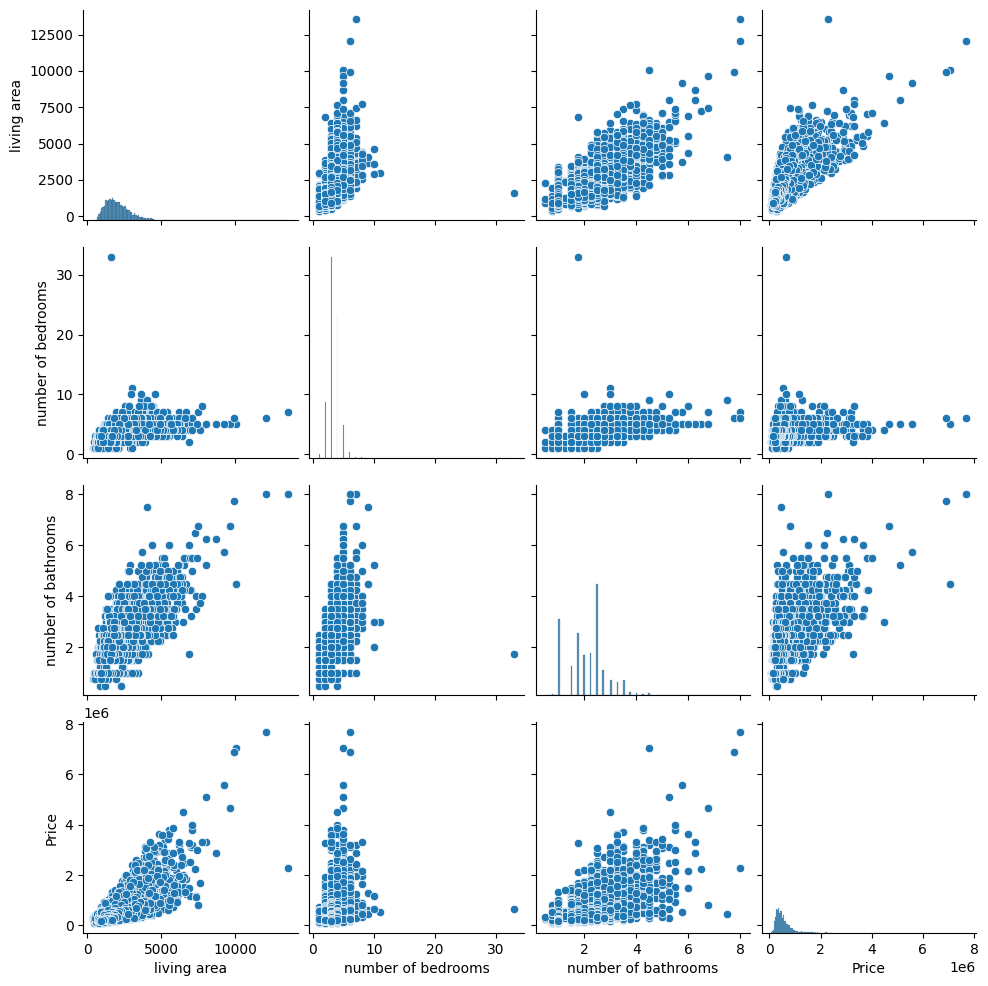

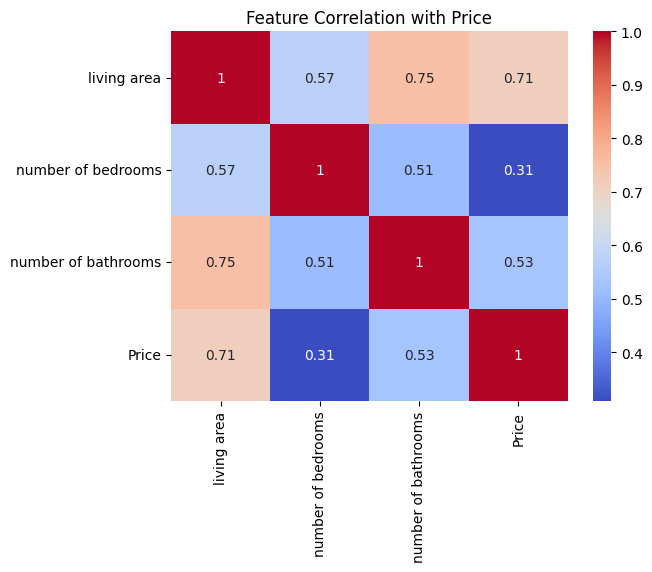

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Price")
plt.show()


In [54]:
from sklearn.model_selection import train_test_split

X = data[['living area', 'number of bedrooms', 'number of bathrooms']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.5163924358217798
MAE: 167930.19446023685
RMSE: 253185.75817962576


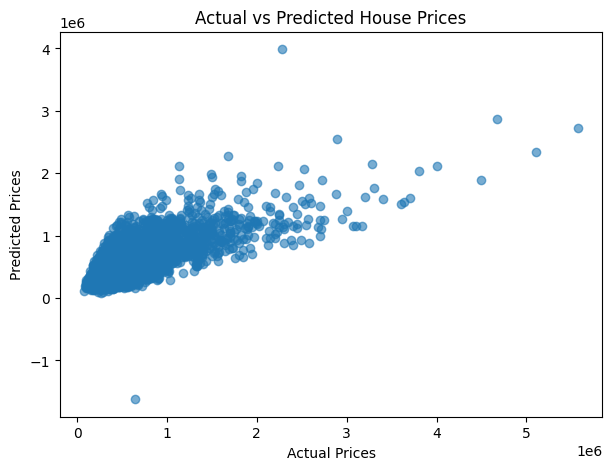

In [57]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [58]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 82673.6014589991
Coefficients: [   319.04115071 -67694.24692594   7294.2016006 ]
